# Logistic Regression

In [1]:
## Import libraries
get_ipython().magic('matplotlib inline')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import expit #Vectorized sigmoid function
from scipy import optimize

In [2]:
# Read in data and create X,y matrix
datafile = '/Users/wiseer85/Documents/Data Science/ML Exercises/data/ex2data1.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
X = np.insert(X,0,1,axis=1)

In [3]:
# Split sample (positive and null classification)
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

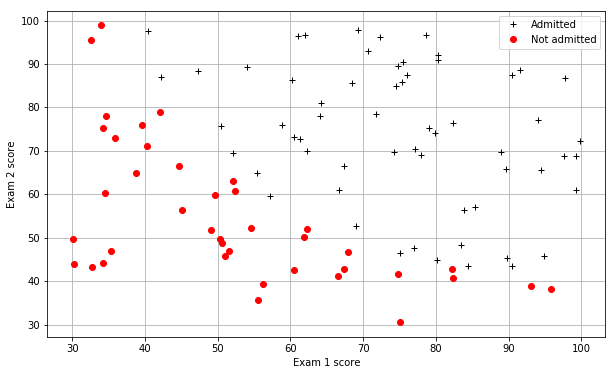

In [4]:
# Scatter plot
def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,1],pos[:,2],'k+',label='Admitted')
    plt.plot(neg[:,1],neg[:,2],'ro',label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)
plotData()

In [5]:
# Logistic hypothesis function
def h(mytheta,myX): 
    return expit(np.dot(myX,mytheta))

# Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.): 
    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

# Check cost returns with theta as zeros
initial_theta = np.zeros((X.shape[1],1))
computeCost(initial_theta,X,y)

0.6931471805599452

In [6]:
# Optimize theta
def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin(computeCost, x0=mytheta, args=(myX, myy, mylambda), maxiter=400, full_output=True)
    return result[0], result[1]

theta, mincost = optimizeTheta(initial_theta,X,y)
print(computeCost(theta,X,y))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
0.2034977015902151


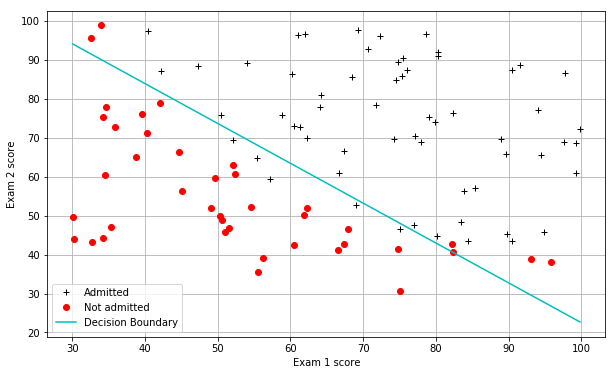

In [7]:
# Plot the decision boundary
boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*boundary_xs)
plotData()
plt.plot(boundary_xs,boundary_ys,'c-',label='Decision Boundary')
plt.legend()

In [8]:
# Calculate admission probability for a student with an exam scores of 45 and 85 
print(h(theta,np.array([1, 45.,85.])))

def makePrediction(mytheta, myx):
    return h(mytheta,myx) >= 0.5

0.776291590411


In [9]:
# Compute the percentage of samples correctly predicted:
pos_correct = float(np.sum(makePrediction(theta,pos)))
neg_correct = float(np.sum(np.invert(makePrediction(theta,neg))))
tot = len(pos)+len(neg)
prcnt_correct = float(pos_correct+neg_correct)/tot
print("Percentage of training samples correctly predicted: %f." % prcnt_correct) 

Percentage of training samples correctly predicted: 0.890000.
